In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format ="{:20.2f}".format
pd.set_option('display.max_columns',100) 

In [3]:
df = pd.read_excel('data/online_retail_II.xlsx',sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [6]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Customer ID,float64,4383,107927,0.205395
Description,object,4681,2928,0.005572
Invoice,object,28816,0,0.000000
StockCode,object,4632,0,0.000000
Quantity,int64,825,0,0.000000
InvoiceDate,datetime64[ns],25296,0,0.000000
Price,float64,1606,0,0.000000
Country,object,40,0,0.000000


In [8]:
df[df['Customer ID'].isnull()]
# there's a price not zero 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [9]:
sum_of_prices =df[df['Customer ID'].isnull() & df['Price']!=0]['Price'].sum()
print(f'sum of prices {sum_of_prices:.2f}')
df[df['Customer ID'].isnull() & df['Price']!=0 ]

sum of prices 840616.41


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525143,538154,82599,FANNY'S REST STOPMETAL SIGN,1,2010-12-09 16:35:00,4.21,NaN,United Kingdom
525144,538154,84029E,RED WOOLLY HOTTIE WHITE HEART.,5,2010-12-09 16:35:00,8.47,NaN,United Kingdom
525145,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47,NaN,United Kingdom
525146,538154,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-09 16:35:00,4.21,NaN,United Kingdom


In [10]:
df['Invoice']= df['Invoice'].astype(str)
df[df['Invoice'].str.match('^\\d{6}$')!= True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [11]:
df['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
df[df['Invoice'].str.startswith('A')]
# we will remove all the --Invoice-- start with A

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [13]:
df[df['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [14]:

df[df['Invoice'].str.startswith('C')].describe()
# we will remove all the --Invoice-- start with C it's Contain --Quantity-- in negitive value 

,Quantity,InvoiceDate,Price,Customer ID
count,10206.00,10206,10206.00,9839.00
mean,-20.91,2010-06-15 17:46:22.586713856,41.67,15035.01
min,-9360.00,2009-12-01 10:33:00,0.01,12346.00
25%,-6.00,2010-03-12 15:16:00,1.65,13576.00
50%,-2.00,2010-06-14 13:32:00,2.95,14911.00
75%,-1.00,2010-10-01 13:35:30,6.75,16454.00
max,1.00,2010-12-09 17:32:00,25111.09,18287.00
std,208.26,NaN,524.28,1690.63


In [15]:
df['StockCode'] = df['StockCode'].astype(str)
df[df['StockCode'].str.match('^\\d{5}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [16]:
print(len(df['StockCode'].str.replace('^\\d{5}','',regex=True).unique()))
df['StockCode'].str.replace('^\\d{5}','',regex=True).unique()

95


array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS0058', 'DCGS0068',
       'DOT', 'U', 'b', 'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V',
       'DCGS0004', 'DCGS0076', 'C2', 'T', 'I', 'BANK CHARGES', 'DCGS0003',
       'O', 'Z', 'TEST001', 'gift_0001_80', 'DCGS0072', 'gift_0001_20',
       'DCGS0044', 'TEST002', 'gift_0001_10', 'gift_0001_50', 'DCGS0066N',
       'm', 'gift_0001_30', 'PADS', 'Y', 'HC', 'e', 'd', 'ADJUST',
       'gift_0001_40', 'gift_0001_60', 'gift_0001_70', 'gift_0001_90',
       'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027', 'DCGS0036',
       'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'j', 'l',
       'DCGS0041', 'n', 'ADJUST2', 'J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [17]:
print(len(df['StockCode'].str.replace('^\\d{5}','',regex=True).unique()))
df['StockCode'].str.replace('^\\d{5}','',regex=True).unique()

95


array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS0058', 'DCGS0068',
       'DOT', 'U', 'b', 'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V',
       'DCGS0004', 'DCGS0076', 'C2', 'T', 'I', 'BANK CHARGES', 'DCGS0003',
       'O', 'Z', 'TEST001', 'gift_0001_80', 'DCGS0072', 'gift_0001_20',
       'DCGS0044', 'TEST002', 'gift_0001_10', 'gift_0001_50', 'DCGS0066N',
       'm', 'gift_0001_30', 'PADS', 'Y', 'HC', 'e', 'd', 'ADJUST',
       'gift_0001_40', 'gift_0001_60', 'gift_0001_70', 'gift_0001_90',
       'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027', 'DCGS0036',
       'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'j', 'l',
       'DCGS0041', 'n', 'ADJUST2', 'J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [18]:
df[df['StockCode'].str.contains('SP1002')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


In [19]:
df[df['StockCode'].str.contains('Y')]
#Remove it because no customer id

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
65206,495218,37365Y,NaN,-148,2010-01-21 17:31:00,0.00,NaN,United Kingdom
89000,497811,DCGSLBOY,NaN,-16,2010-02-12 14:45:00,0.00,NaN,United Kingdom
101692,499040,DCGSSBOY,NaN,-90,2010-02-24 13:16:00,0.00,NaN,United Kingdom
241371,512737,DCGSSBOY,update,100,2010-06-17 14:10:00,0.00,NaN,United Kingdom
244830,513099,DCGSSBOY,BOYS PARTY BAG,5,2010-06-21 15:13:00,3.36,NaN,United Kingdom
246183,513200,DCGSSBOY,BOYS PARTY BAG,7,2010-06-22 16:28:00,3.36,NaN,United Kingdom
249937,513574,DCGSSBOY,BOYS PARTY BAG,3,2010-06-25 15:13:00,3.36,NaN,United Kingdom
251929,513655,DCGSSBOY,BOYS PARTY BAG,4,2010-06-28 10:02:00,3.36,NaN,United Kingdom
278355,516470,DCGSSBOY,BOYS PARTY BAG,1,2010-07-20 15:28:00,3.36,NaN,United Kingdom
385191,526405,DCGSSBOY,BOYS PARTY BAG,1,2010-10-11 13:53:00,3.36,NaN,United Kingdom


In [20]:
df[df['StockCode'].str.contains('ADJUST')]
#Remove it adjusted prices 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.00,United Kingdom
...,...,...,...,...,...,...,...,...
208670,C509474,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,72.45,16422.00,United Kingdom
208671,C509475,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,358.47,17364.00,United Kingdom
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom


In [21]:
df[df['StockCode'].str.contains('TEST')]
# remove it because it contain test product

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.00,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.00,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.00,NaN,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.00,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.00,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.00,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.00,United Kingdom


In [22]:
df[df['StockCode'].str.contains('BANK CHARGES')]
#remove it because it is a charge

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2010-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.00,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.00,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.00,United Kingdom


In [23]:
df[df['StockCode'].str.contains('PADS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [24]:
df[df['StockCode'].str.contains('POST')]
#remove it because it is a charge

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [25]:
df[df['StockCode'].str.contains('^[A-Za-z]\d*$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
522330,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.00,United Kingdom
522913,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.00,13369.00,United Kingdom
522954,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.00,14932.00,Channel Islands
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom


In [26]:
df[df['StockCode'].str.contains('^[A-Za-z]\d*$')][['StockCode','Description']].drop_duplicates()
#remove all of them

,StockCode,Description
735,D,Discount
2697,M,Manual
9292,C2,CARRIAGE
32207,C2,NaN
96608,m,Manual
114061,S,SAMPLES
179403,B,Adjust bad debt
302041,C3,NaN


In [27]:
df[df['StockCode'].str.contains('^[A-Za-z]{2}\d*$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


In [28]:
df[df['StockCode'].str.contains('^\d+[A-Za-z]$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [29]:
df[df['StockCode'].str.contains('^\d+[A-Za-z]$')][['Description']].drop_duplicates()

,Description
1,PINK CHERRY LIGHTS
2,WHITE CHERRY LIGHTS
12,DOOR MAT BLACK FLOCK
23,SET OF 3 BLACK FLYING DUCKS
28,SMALL MARSHMALLOWS PINK BOWL
...,...
486130,MOP PENDANT SHELL NECKLACE
496957,AMBER 3 BEAD DROP EARRINGS
511393,"SILICON CUBE 25W, BLUE"
516152,check


In [30]:
df[df['StockCode'].str.contains('^\d+[A-Za-z]{2}$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
572,489522,79323LP,LIGHT PINK CHERRY LIGHTS,1,2009-12-01 11:45:00,6.75,15998.00,United Kingdom
613,489526,15056BL,EDWARDIAN PARASOL BLACK,6,2009-12-01 11:50:00,5.95,12533.00,Germany
1762,C489588,79323GR,GREEN CHERRY LIGHTS,-2,2009-12-01 14:01:00,6.75,13711.00,United Kingdom
2620,489604,15056bl,EDWARDIAN PARASOL BLACK,1,2009-12-01 14:47:00,13.00,NaN,United Kingdom
3142,489658,15056BL,EDWARDIAN PARASOL BLACK,12,2009-12-01 17:31:00,5.95,15485.00,United Kingdom
...,...,...,...,...,...,...,...,...
519063,537645,15056bl,EDWARDIAN PARASOL BLACK,2,2010-12-07 15:34:00,12.72,NaN,United Kingdom
520482,537769,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-08 12:17:00,5.95,15021.00,United Kingdom
524462,538093,15056BL,EDWARDIAN PARASOL BLACK,12,2010-12-09 14:49:00,5.95,12682.00,France
524777,538148,15056bl,EDWARDIAN PARASOL BLACK,3,2010-12-09 16:26:00,12.72,NaN,United Kingdom


In [31]:
df[df['StockCode'].str.contains('^\d+[A-Za-z]{2}$')][['Description']].drop_duplicates()

,Description
572,LIGHT PINK CHERRY LIGHTS
613,EDWARDIAN PARASOL BLACK
1762,GREEN CHERRY LIGHTS
6556,sold as gold
68648,NaN


### Data Cleaning

In [32]:
cleaned_df =df.copy()

In [33]:
cleaned_df['Invoice'] =cleaned_df['Invoice'].astype(str)
mask= (
    cleaned_df['Invoice'].str.match('^\\d{6}$')
)
cleaned_df =cleaned_df[mask]

In [34]:
cleaned_df['StockCode'] =cleaned_df['StockCode'].astype(str)
mask= (
    cleaned_df['StockCode'].str.match('^\\d{5}$') |
    cleaned_df['StockCode'].str.match('^\d+[A-Za-z]{2}$') |
    cleaned_df['StockCode'].str.match('^\d+[A-Za-z]$') |
    cleaned_df['StockCode'].str.match('^[A-Za-z]{2}\d*$') |
    cleaned_df['StockCode'].str.match('^[mM]\d*$')     
)
cleaned_df =cleaned_df[mask]

In [35]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406751 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406751 non-null  object        
 1   StockCode    406751 non-null  object        
 2   Description  406751 non-null  object        
 3   Quantity     406751 non-null  int64         
 4   InvoiceDate  406751 non-null  datetime64[ns]
 5   Price        406751 non-null  float64       
 6   Customer ID  406751 non-null  float64       
 7   Country      406751 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [39]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406751.00,406751,406751.00,406751.00
mean,13.61,2010-07-01 10:08:25.034431488,3.23,15373.70
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:31:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,10953.50,18287.00
std,96.95,NaN,34.69,1677.40


In [36]:
print(f"Percentage of rest data after cleaned {cleaned_df.shape[0]/df.shape[0]*100:.2f}%")

Percentage of rest data after cleaned 77.41%


### Feature Engineering

In [41]:
cleaned_df['SaleslineTotal']= cleaned_df['Quantity']* cleaned_df['Price']
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SaleslineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [45]:
aggregated_df= cleaned_df.groupby(by='Customer ID' ,as_index=False).agg(
    MonatoryValue =('SaleslineTotal','sum'),
    Frequency=('Invoice','nunique'),
    LastInvoiceDate=('InvoiceDate','max')
)
aggregated_df.head()

,Customer ID,MonatoryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [47]:
max_invoice_date =aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [49]:
aggregated_df['Recency'] = (max_invoice_date-aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

,Customer ID,MonatoryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


In [70]:
aggregated_df.describe()

,Customer ID,MonatoryValue,Frequency,LastInvoiceDate,Recency
count,4300.00,4300.00,4300.00,4300,4300.00
mean,15354.63,2039.99,4.44,2010-09-10 21:55:37.060465152,89.64
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13890.75,307.95,1.00,2010-07-27 13:47:30,17.00
50%,15355.00,702.93,2.00,2010-10-19 09:21:00,51.00
75%,16838.25,1713.10,5.00,2010-11-22 11:10:30,135.00
max,18287.00,349164.35,200.00,2010-12-09 20:01:00,373.00
std,1699.02,8893.43,8.08,NaN,96.28


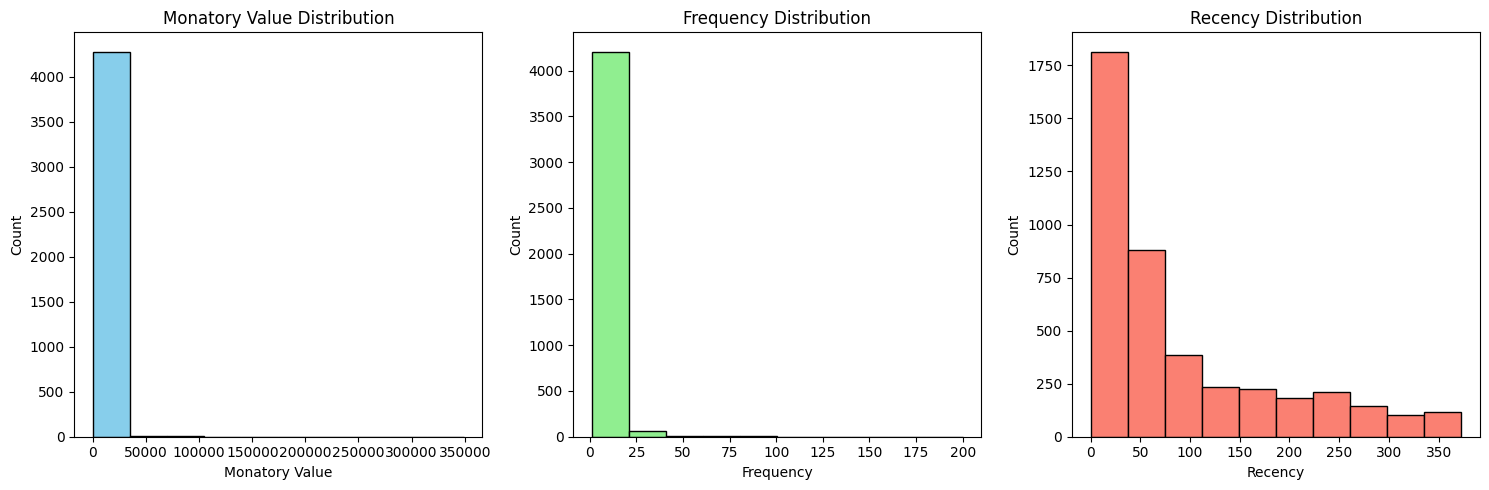

In [55]:
plt.figure (figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonatoryValue'],bins=10 ,color='skyblue' ,edgecolor = 'black')
plt.title('Monatory Value Distribution')
plt.xlabel('Monatory Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins=10 ,color='lightgreen' ,edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins=10 ,color='salmon' ,edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



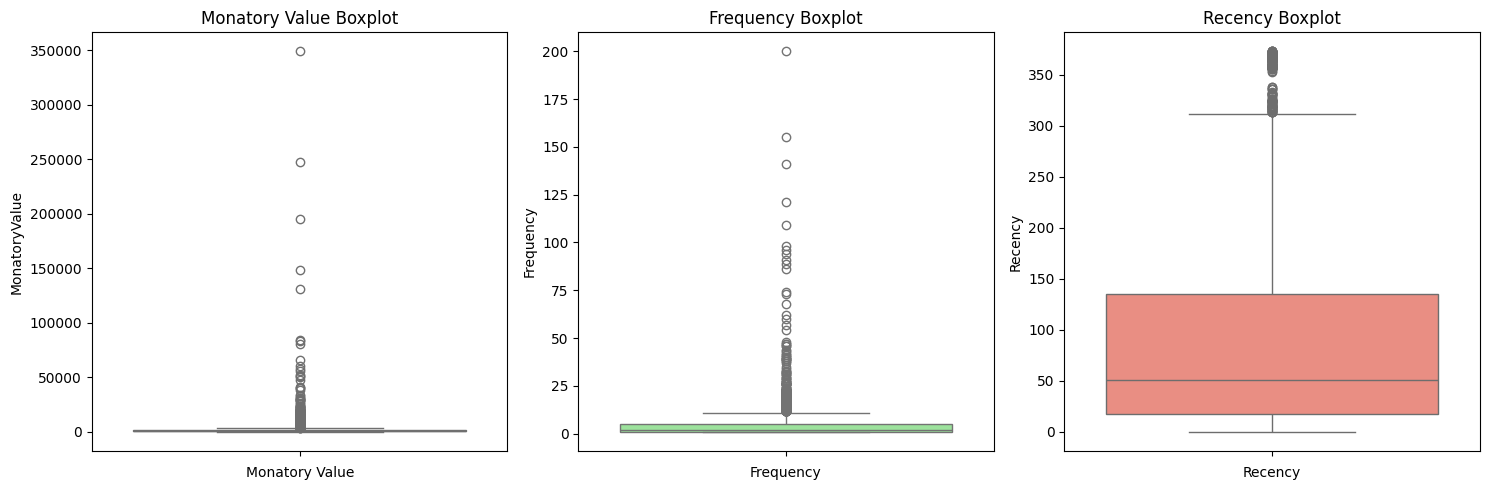

In [59]:
plt.figure (figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonatoryValue'] ,color='skyblue')
plt.title('Monatory Value Boxplot')
plt.xlabel('Monatory Value')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'],color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'] ,color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [63]:

M_Q1 =aggregated_df['MonatoryValue'].quantile(0.25)
M_Q3 =aggregated_df['MonatoryValue'].quantile(0.75)
M_IQR =M_Q3 -M_Q1
print(f'Monatory Value Q1 = {M_Q1} ,Q3 = {M_Q3} ,IQR = {M_IQR}')

Monatory Value Q1 = 307.95 ,Q3 = 1713.0975 ,IQR = 1405.1475


In [64]:
montary_outlier_df= aggregated_df[aggregated_df['MonatoryValue']>(M_Q3+1.5*M_IQR)].copy()
montary_outlier_df.describe()

,Customer ID,MonatoryValue,Frequency,LastInvoiceDate,Recency
count,424.00,424.00,424.00,424,424.00
mean,15077.78,12328.11,17.21,2010-11-08 21:06:38.773584896,30.67
min,12357.00,3851.01,1.00,2009-12-10 18:03:00,0.00
25%,13596.75,4617.97,8.00,2010-11-08 10:35:30,3.00
50%,14944.00,6262.35,12.00,2010-11-26 11:15:30,13.00
75%,16659.50,10409.57,18.00,2010-12-06 09:54:45,31.00
max,18260.00,349164.35,200.00,2010-12-09 19:32:00,364.00
std,1725.44,26067.45,20.26,NaN,52.08


In [65]:
F_Q1 =aggregated_df['Frequency'].quantile(0.25)
F_Q3 =aggregated_df['Frequency'].quantile(0.75)
F_IQR =F_Q3 - F_Q1
print(f'Frequency Q1 = {F_Q1} ,Q3 = {F_Q3} ,IQR = {F_IQR}')

Frequency Q1 = 1.0 ,Q3 = 5.0 ,IQR = 4.0


In [66]:
frequency_outlier_df= aggregated_df[aggregated_df['Frequency']>(F_Q3+1.5*F_IQR)].copy()
frequency_outlier_df.describe()

,Customer ID,MonatoryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14520.55,23.98,2010-11-23 11:07:12.043010816,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11707.62,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,200.00,2010-12-09 19:32:00,211.00
std,1748.43,31710.92,22.63,NaN,26.59


In [72]:
non_outlier_df = aggregated_df[ (~ aggregated_df.index.isin(montary_outlier_df.index)) & (~ aggregated_df.index.isin(frequency_outlier_df.index)) ]
non_outlier_df.describe()

,Customer ID,MonatoryValue,Frequency,LastInvoiceDate,Recency
count,3822.00,3822.00,3822.00,3822,3822.00
mean,15376.20,888.53,2.87,2010-09-03 10:13:45.086342144,97.13
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13913.50,280.91,1.00,2010-07-08 14:31:30,22.00
50%,15384.50,588.13,2.00,2010-10-12 14:28:00,58.00
75%,16852.50,1269.08,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3817.18,11.00,2010-12-09 20:01:00,373.00
std,1691.99,823.19,2.24,NaN,98.03


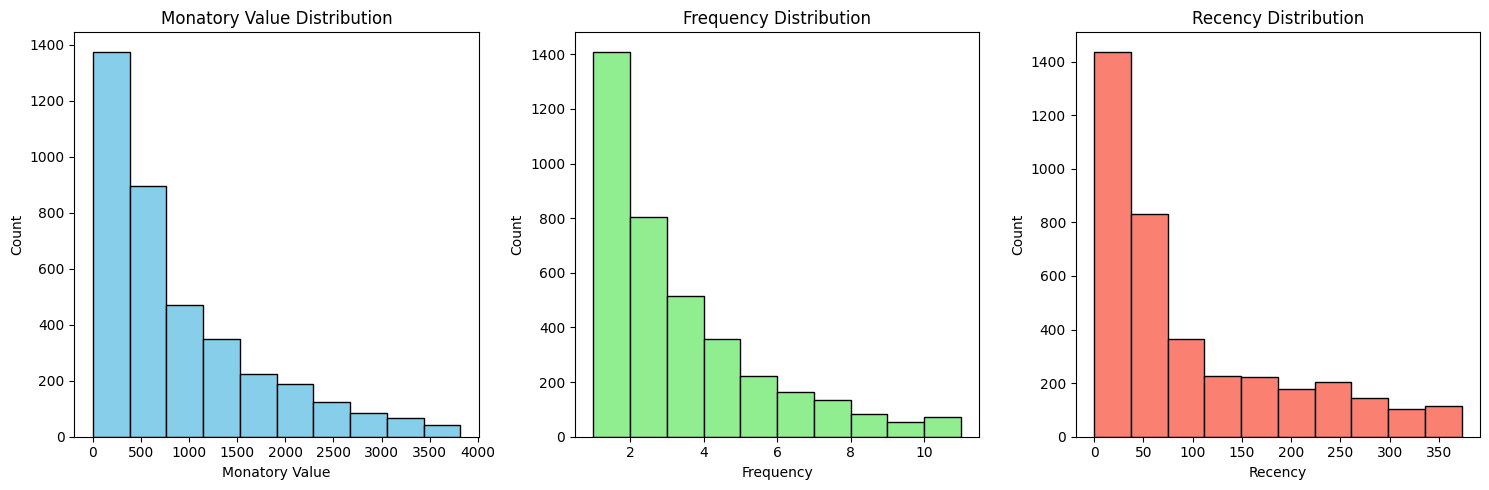

In [73]:
plt.figure (figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(non_outlier_df['MonatoryValue'],bins=10 ,color='skyblue' ,edgecolor = 'black')
plt.title('Monatory Value Distribution')
plt.xlabel('Monatory Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(non_outlier_df['Frequency'],bins=10 ,color='lightgreen' ,edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(non_outlier_df['Recency'],bins=10 ,color='salmon' ,edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


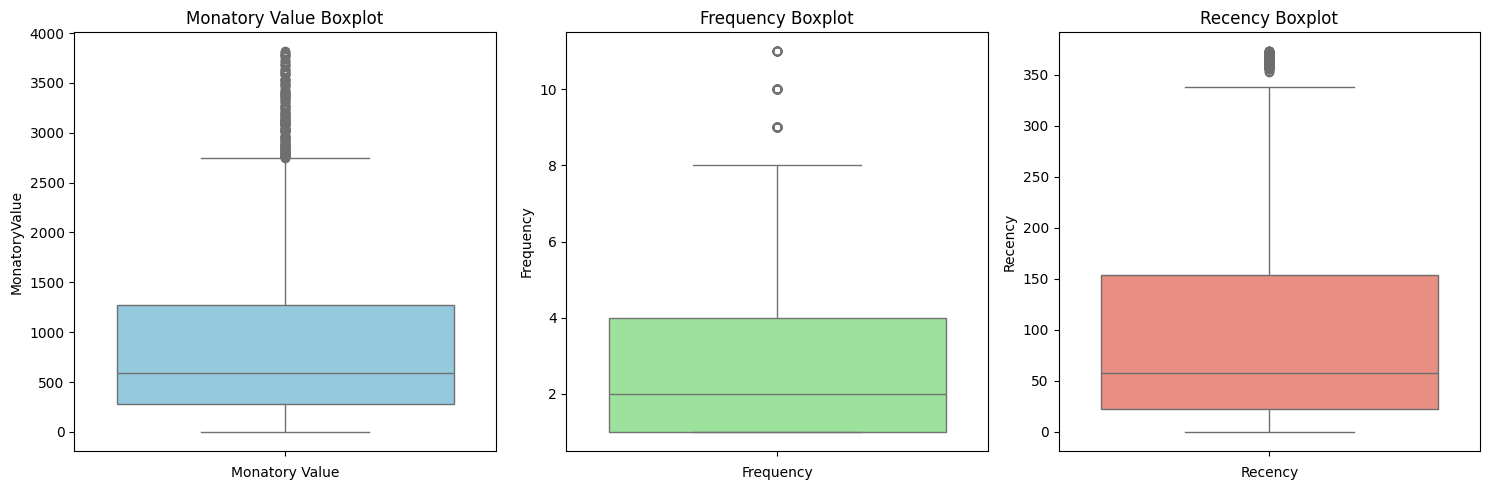

In [74]:
plt.figure (figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outlier_df['MonatoryValue'] ,color='skyblue')
plt.title('Monatory Value Boxplot')
plt.xlabel('Monatory Value')

plt.subplot(1,3,2)
sns.boxplot(non_outlier_df['Frequency'],color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(non_outlier_df['Recency'] ,color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

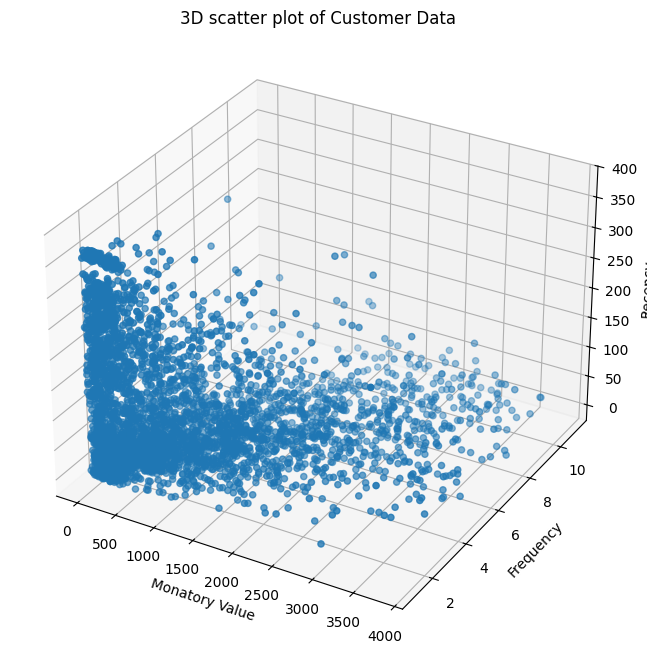

In [75]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outlier_df['MonatoryValue'],non_outlier_df['Frequency'],non_outlier_df['Recency'])
ax.set_xlabel('Monatory Value') 
ax.set_ylabel('Frequency') 
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of Customer Data')
plt.show()

In [76]:
scaler =StandardScaler()
scaled_data = scaler.fit_transform(non_outlier_df[['MonatoryValue','Frequency','Recency']])
scaled_data

array([[-0.87374351, -0.38647882,  0.68229525],
       [ 0.5282467 , -0.38647882, -0.97054465],
       [-0.81080971, -0.83206617, -0.24615185],
       ...,
       [-0.62147372, -0.83206617,  2.01885097],
       [ 0.4348301 , -0.38647882,  0.14155133],
       [ 1.70964057,  0.50469588, -0.81750392]])

In [78]:
scaled_data_df =pd.DataFrame(scaled_data,index=non_outlier_df.index ,columns=['MonatoryValue','Frequency','Recency'])
scaled_data_df

,MonatoryValue,Frequency,Recency
0,-0.87,-0.39,0.68
1,0.53,-0.39,-0.97
2,-0.81,-0.83,-0.25
3,1.62,-0.39,-0.56
4,-0.71,-0.83,-0.89
...,...,...,...
4295,-0.30,1.40,-0.82
4296,-0.58,-0.83,-0.32
4297,-0.62,-0.83,2.02
4298,0.43,-0.39,0.14


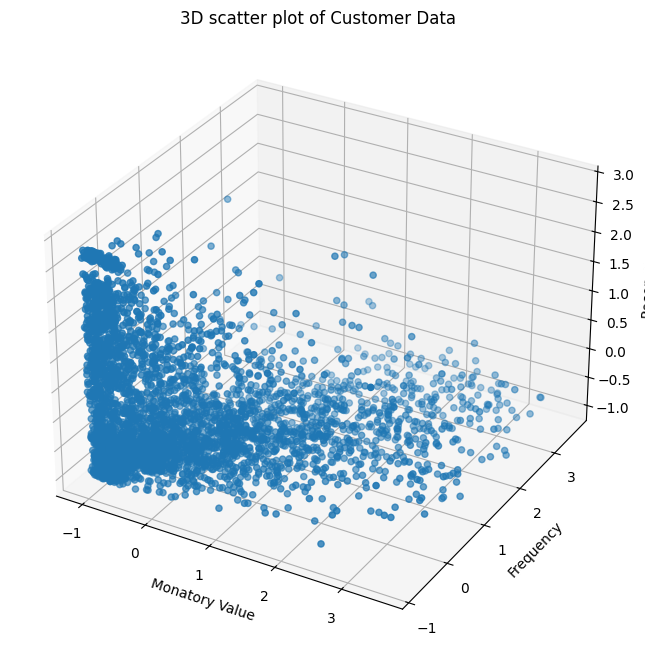

In [80]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(scaled_data_df['MonatoryValue'],scaled_data_df['Frequency'],scaled_data_df['Recency'])
ax.set_xlabel('Monatory Value') 
ax.set_ylabel('Frequency') 
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of Customer Data')
plt.show()